In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_datasets as tfds

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch  

**4.- Desarrolle una CNN con 2 capas de convolución.**
**Entrene la red con los mismos parámetros anteriores. Realice una tabla con los datos de tiempos de entrenamiento y accuracy para ambas redes.**

In [3]:
split = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=split)
(raw_train, raw_validation, raw_test), info = tfds.load('cats_vs_dogs', split=list(splits), with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/2.0.1. Subsequent calls will reuse this data.


In [4]:
print(splits)

(NamedSplit('train')(tfds.percent[0:80]), NamedSplit('train')(tfds.percent[80:90]), NamedSplit('train')(tfds.percent[90:100]))


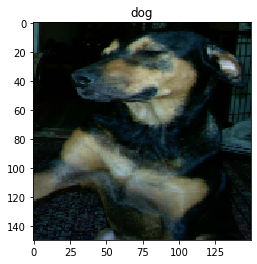

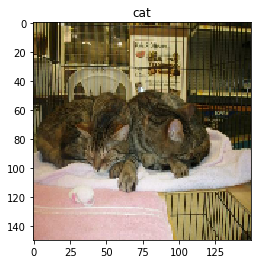

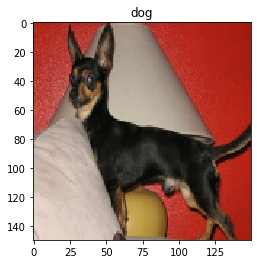

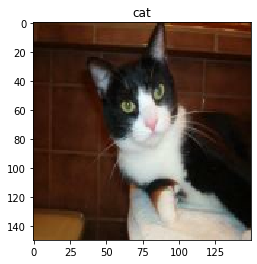

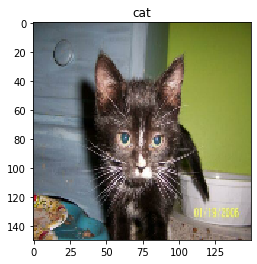

In [5]:
BATCH_SIZE = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150
SHUFFLE_BUFFER_SIZE = 1000

#funcion para redimensionar imagenes
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255
  image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
  return image, label

#aplico redimensionamiento a los datos
train = raw_train.map(format)
validation = raw_validation.map(format)
test = raw_test.map(format)

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).repeat().batch(BATCH_SIZE)
validation_batches = validation.repeat().batch(SHUFFLE_BUFFER_SIZE)
test_batches = test.batch(SHUFFLE_BUFFER_SIZE)


get_label_name = info.features['label'].int2str
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))


In [0]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

In [8]:
model = Sequential()
#bloque 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               10616960  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
num_train, num_val, num_test = (
  info.splits['train'].num_examples*weight/10
  for weight in split
)

initial_epochs = 15

history = model.fit(train_batches,
                    steps_per_epoch = round(num_train)//BATCH_SIZE,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    validation_steps=10)


Train for 290 steps, validate for 10 steps
Epoch 1/15
290/290 [==============================] - 77s 264ms/step - loss: 0.7621 - accuracy: 0.6439 - val_loss: 0.5516 - val_accuracy: 0.7079
Epoch 2/15
290/290 [==============================] - 76s 261ms/step - loss: 0.5126 - accuracy: 0.7533 - val_loss: 0.4942 - val_accuracy: 0.7677
Epoch 3/15
290/290 [==============================] - 76s 261ms/step - loss: 0.4254 - accuracy: 0.8051 - val_loss: 0.4785 - val_accuracy: 0.7760
Epoch 4/15
290/290 [==============================] - 79s 273ms/step - loss: 0.3410 - accuracy: 0.8515 - val_loss: 0.5701 - val_accuracy: 0.7525
Epoch 5/15
290/290 [==============================] - 78s 268ms/step - loss: 0.2538 - accuracy: 0.8963 - val_loss: 0.6693 - val_accuracy: 0.7636
Epoch 6/15
290/290 [==============================] - 78s 270ms/step - loss: 0.1708 - accuracy: 0.9323 - val_loss: 0.6595 - val_accuracy: 0.7848
Epoch 7/15
290/290 [==============================] - 79s 271ms/step - loss: 0.1027 - a

Se trabajo el modelo con loss='binary_crossentropy' ya que brindaba mejores resultados


**PRUEBA DEL MODELO**

In [12]:
print(train)
print(test)
print(raw_test)
print(test_batches)

<MapDataset shapes: ((150, 150, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((150, 150, 3), ()), types: (tf.float32, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>


In [17]:
results = model.evaluate(test_batches)

3/3 [==============================] - 6s 2s/step - loss: 1.9767 - accuracy: 0.7823


In [18]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 1.976728876431783
Test accuracy: 0.7823276


In [19]:
predictions = model.predict_classes(test_batches, batch_size=None)
print('predictions shape:', predictions.shape)

predictions shape: (2320, 1)


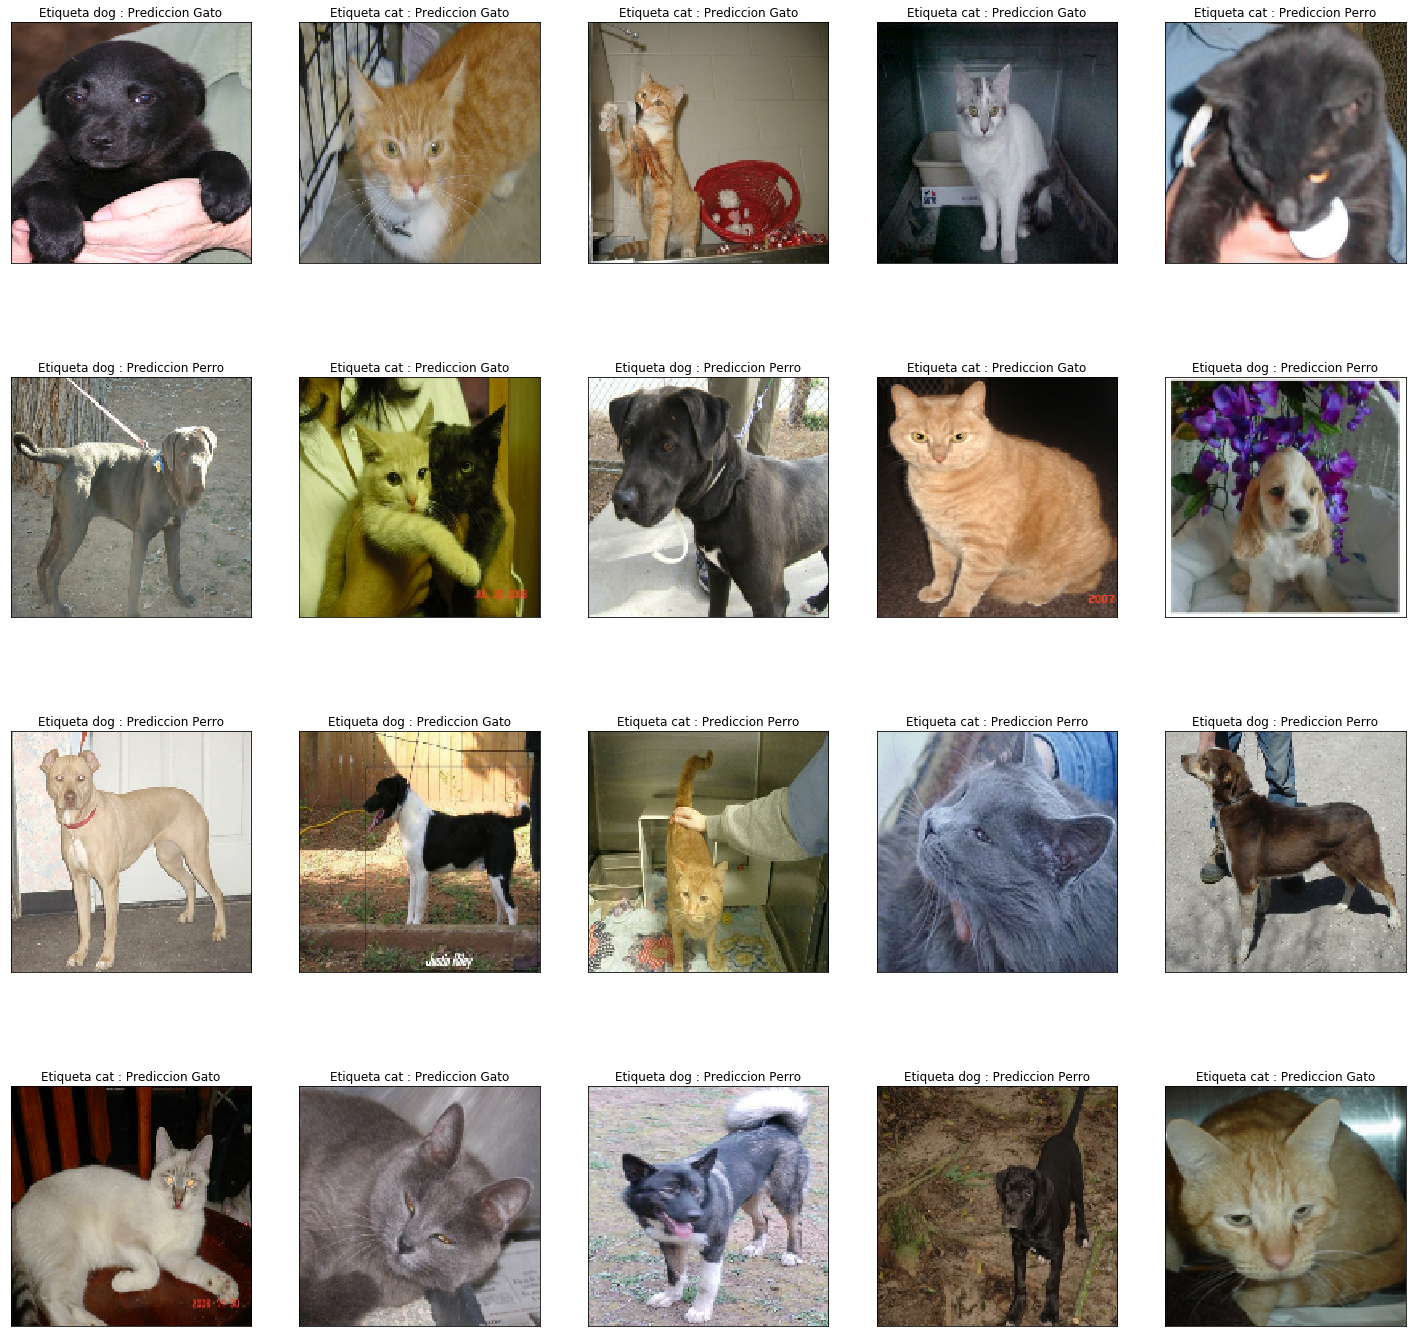

In [20]:
fig, axes = plt.subplots(4, 5, figsize=(25, 25), subplot_kw={'xticks': (), 'yticks': ()}) 
get_label_name = info.features['label'].int2str
classes = {0: 'Gato', 1: 'Perro'}
for image,pred,ax in zip(test.take(20),predictions,axes.ravel()):
  ax.imshow(image[0])
  ax.set_title("Etiqueta {} : Prediccion {}".format(get_label_name(image[1]), classes[pred[0]]))
